* Travail Realisé par **Ilyes REZGUI**
* Groupe : **M1 Recherche 1**
* Date: 10/01/2023
* Institut Superieur d'informatique Tunis Manar
* Matiere : Modelisation probabiliste




# **Cette fonction est pour faire un regime transitoire**


In [1]:
import numpy as np

def markov(M, pi0, n):

    # Conditions
    if not isinstance(M, np.ndarray) or not isinstance(pi0, np.ndarray):
        print("Error becuase entries have to be numpy arrays")

    if M.shape[0] != M.shape[1]:
        print("La matrice de transition doit être carrée.")

    if pi0.shape[0] != M.shape[0]:
        print("Le nombre de lignes du vecteur d'état initial doit être égal au rang de la matrice.")

    if n < 1:
        print ("Le nombre d'itérations (m) doit être supérieur à 1.")

    # RQ: linlag is the library I used to perform linear algebre functions. One of the operations it supports is the matrix_power
    result = np.dot(pi0, np.linalg.matrix_power(M, n))

    return result

In [2]:
Mat_trans = np.array([[0.7,0.3], [0.2,0.8]])
pi0 = np.array([0.6, 0.4]) # represnete les probas d'etre a l'etat 1 et l'etat 2 a l'instant 0
m = 3
# Appeler la fonction markov
result = markov(Mat_trans, pi0, m)
print(result)

[0.425 0.575]



# **Visualizer le graph**




In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph_from_trans_matrix(matrix):
    # G is going to be the directed graph
    G = nx.DiGraph(matrix)
    # Draw the graph
    nx.draw(G,with_labels=True, font_weight='bold', node_size=800, node_color='green',
            font_color='black', font_size=8, edge_color='gray', font_family='sans-serif')

    plt.title("Graphe associé à la Matrice de transition")
    plt.show()

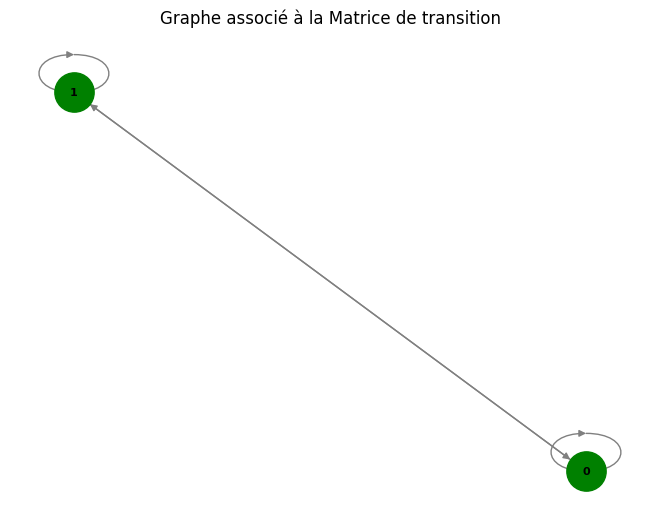

In [4]:
plot_graph_from_trans_matrix(Mat_trans)

# **Verifier si le la chaine est irreductible Ou Reductible**

In [5]:
def is_irreducible(matrix):
    # Vérifier que la matrice est carrée
    if not matrix.shape[0] == matrix.shape[1]:
        print("La matrice doit être carrée.")

    # Créer un graphe dirigé à partir de la matrice d'adjacence
    G = nx.DiGraph(matrix)

    # Vérifier la forte connexité du graphe
    return nx.is_strongly_connected(G)

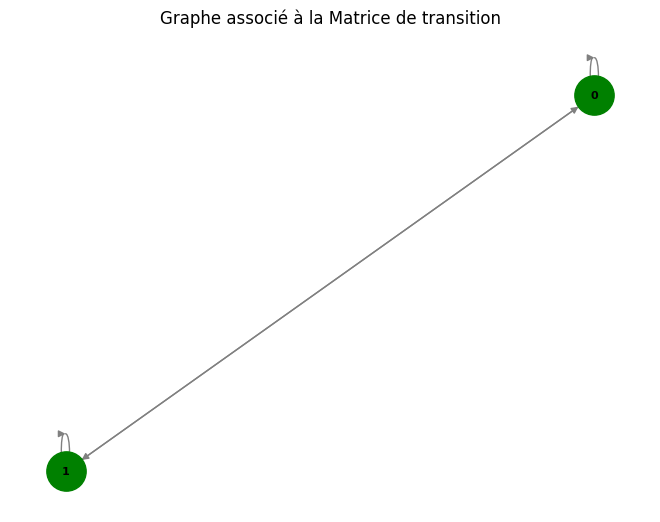

La matrice est irréductible (le graphe est fortement connexe).


In [17]:
matrix=np.array([[0.7,0.3], [0.2,0.8]])
plot_graph_from_trans_matrix(matrix)
if is_irreducible(Mat_trans):
    print("La matrice est irréductible (le graphe est fortement connexe).")
else:
    print("La matrice est réductible (le graphe n'est pas fortement connexe).")

# **Retourner les etats absorbants**



In [7]:
import numpy as np

def get_absorbing_states(transition_matrix):
    num_states = transition_matrix.shape[0]
    absorbing_states = []

    for state in range(num_states):
        # Vérifier si la probabilité de rester dans l'état est égale à 1 (p_{ii} = 1)
        if transition_matrix[state, state] == 1:
            absorbing_states.append(state)

    return absorbing_states

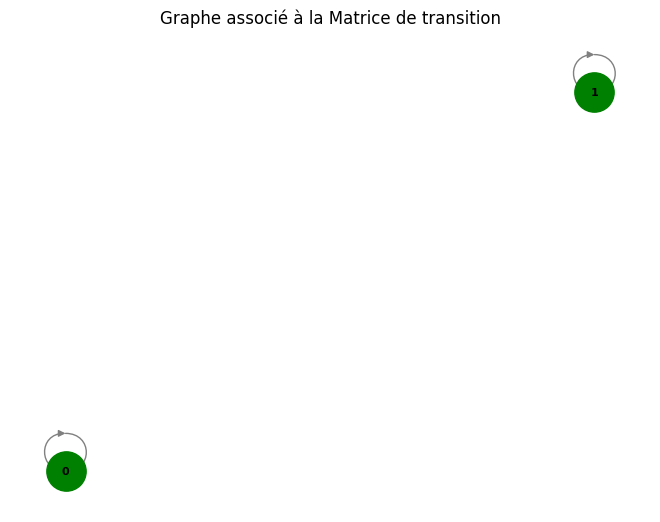

États absorbants : [0, 1]


In [19]:
# Exemple d'utilisation
Mat_trans = np.array([[1,0], [0,1]])
plot_graph_from_trans_matrix(Mat_trans)
absorbing_states = get_absorbing_states(Mat_trans)

print(f"États absorbants : {absorbing_states}")


# **Retourner les etats récurrents NN & Transitoires**

In [20]:
import numpy as np
import networkx as nx

def get_recurrent_and_transient_states(transition_matrix):
    num_states = transition_matrix.shape[0]
    graph = nx.DiGraph(transition_matrix)

    recurrent_states = []
    transient_states = []

    for state in range(num_states):
        # Vérifier la récurrence en vérifiant si l'état peut être atteint depuis n'importe quel autre état
        is_recurrent = all(nx.has_path(graph, source=other_state, target=state) for other_state in range(num_states) if other_state != state)

        if is_recurrent:
            recurrent_states.append(state)
        else:
            transient_states.append(state)

    return recurrent_states, transient_states

# Exemple d'utilisation
Mat_trans = np.array([[0, 0.5, 0, 0.25, 0, 0.25, 0],
                      [0.5, 0, 0.5, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0.5, 0.5, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 1, 0]])

recurrent_states, transient_states = get_recurrent_and_transient_states(Mat_trans)

print(f"États récurrents : {recurrent_states}")
print(f"États transitoires : {transient_states}")


États récurrents : []
États transitoires : [0, 1, 2, 3, 4, 5, 6]


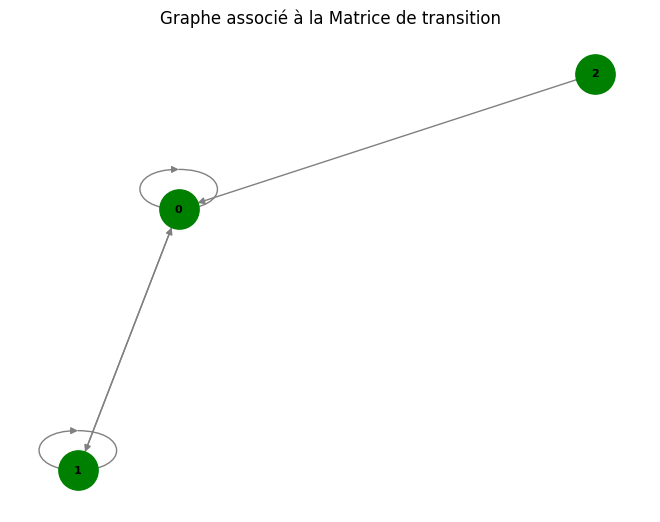

États récurrents : [0, 1]
États transitoires : [2]


In [21]:
Mat_trans = np.array([[0.7,0.3,0], [0.2,0.8,0], [1,0,0]])
plot_graph_from_trans_matrix(Mat_trans)

recurrent_states, transient_states = get_recurrent_and_transient_states(Mat_trans)

print(f"États récurrents : {recurrent_states}")
print(f"États transitoires : {transient_states}")


# **Retourner les etats Periodiques & A-Periodique**

In [11]:
import numpy as np

def is_periodic_state(transition_matrix, state):
    num_states = transition_matrix.shape[0]

    # Check if the state has a self-loop
    if transition_matrix[state, state] > 0:
        return False

    for k in range(2, num_states + 1):
        prob_km = np.linalg.matrix_power(transition_matrix, k)[state, state]

        if prob_km > 0 and (k % np.gcd(k, num_states)) == 0:
            return True

    return False




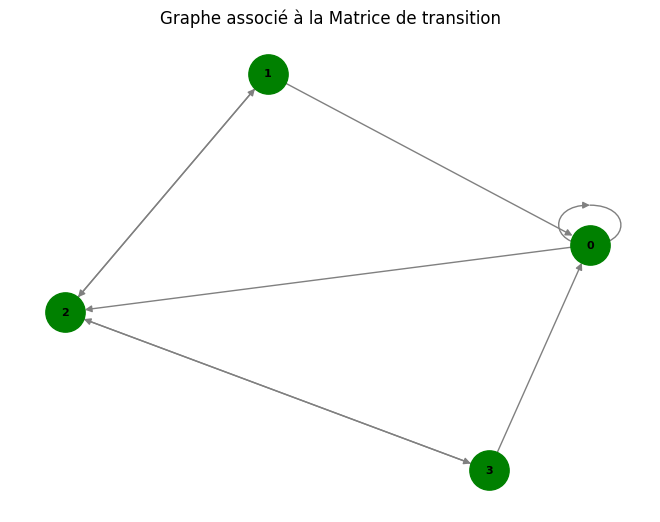

État 0 est apériodique.
État 1 est périodique.
État 2 est périodique.
État 3 est périodique.


In [12]:
# Example usage
Mat_trans = np.array([[0.3, 0, 0.7, 0], [0.5, 0, 0.5, 0], [0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0]])
plot_graph_from_trans_matrix(Mat_trans)


for state in range(Mat_trans.shape[0]):
    if is_periodic_state(Mat_trans, state):
        print(f"État {state} est périodique.")
    else:
        print(f"État {state} est apériodique.")

# **Verifier si CMTD est Periodique ou A-periodique**

In [13]:
def CMTD_periodique(Mat_trans):
  nb_states_periodique=0
  for state in range(Mat_trans.shape[0]):
    if is_periodic_state(Mat_trans, state):
      nb_states_periodique =nb_states_periodique+1
  return  Mat_trans.shape[0]==nb_states_periodique




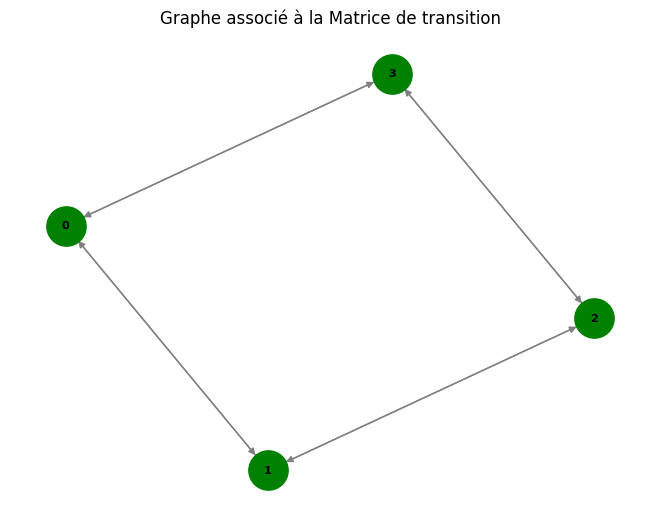

La chaine de markov a temps discret est Periodique 


In [14]:
Mat_trans = np.array([[0,0.5 , 0,0.5], [0.5, 0, 0.5, 0], [0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0]])
plot_graph_from_trans_matrix(Mat_trans)
if CMTD_periodique(Mat_trans):
  print("La chaine de markov a temps discret est Periodique ")
else:
  print("La chaine de markov a temps discret est A-Periodique ")


# **Retourner la periode pour une CMTD periodique**

In [31]:
def get_markov_chain_period(transition_matrix):
    num_states = transition_matrix.shape[0]
    graph = nx.DiGraph(transition_matrix)

    cycles = nx.simple_cycles(graph) # get the cycles
    cycle_lengths = [len(cycle) for cycle in cycles] # get all length of cycles
    if CMTD_periodique(transition_matrix):  # if the CMTD est periodique
      return np.gcd.reduce(cycle_lengths) # get its cycles as PGCD
    else:
      print("La CMTD est A-periodique donc elle n'a pas de periode")




In [32]:
# Example usage
Mat_trans = np.array([[0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0], [0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0]])

markov_chain_period = get_markov_chain_period(Mat_trans)

print(f"Période de la chaîne de Markov : {markov_chain_period}")

Période de la chaîne de Markov : 2


# **Verifier si une CMTD va se converger vers un Regime Permanant en utilisant la condition suffissante : Aperiodique et irreductible**

In [23]:
def permanant(Mat):
  if is_irreducible(Mat) and CMTD_periodique(Mat)==False :
    return True
  else :
    return False

In [29]:
# Example usage
Mat_trans = np.array([[0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0], [0, 0.5, 0, 0.5], [0.5, 0, 0.5, 0]])

if permanant(Mat_trans):
  print("Cette CMTD converge vers un regime permanant")
